## Data quality summary of raw internal data file used by DOT

In [1]:
import os
import pandas as pd
%matplotlib inline
from datetime import timedelta
sample_file = '/gpfs2/projects/project-bus_capstone_2016/workspace/share/20141201_dot.csv'

In [2]:
dot_sample = pd.read_csv(sample_file,header=None,names=['Vehicle','Route','Direction','Phase','NMEA'])

In [3]:
dot_sample.head()

,Vehicle,Route,Direction,Phase,NMEA
0,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002005.610,A,4047.23656,N,07356.79964,W..."
1,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002037.609,A,4047.23656,N,07356.79964,W..."
2,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002109.609,A,4047.23656,N,07356.79964,W..."
3,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002140.609,A,4047.23656,N,07356.79964,W..."
4,1001,MTA NYCT_M101,0,DEADHEAD_BEFORE,"$GPRMC,002520.609,A,4047.23656,N,07356.79964,W..."


In [5]:
# apply function to extract time element from NMEA string
def time_from_nmea(s):
    h = int(s[7:9])
    m = int(s[9:11])
    s = float(s[11:16])
    return timedelta(hours=h,minutes=m,seconds=s)
dot_sample['timestamp'] = dot_sample.NMEA.apply(time_from_nmea)

In [6]:
dot_sample.sort(['Vehicle','timestamp'],inplace=True)
dot_sample['elapsed'] = dot_sample.groupby(['Vehicle'])['timestamp'].diff()/timedelta(seconds=1)

In [7]:
dot_sample.head(10)

,Vehicle,Route,Direction,Phase,NMEA,timestamp,elapsed
90877,133,NaN,NaN,DEADHEAD_BEFORE,"$GPRMC,105819.672,A,4053.02190,N,07349.52910,W...",10:58:19.670000,NaN
90878,133,NaN,NaN,DEADHEAD_BEFORE,"$GPRMC,105850.673,A,4052.99660,N,07349.66840,W...",10:58:50.670000,31.0
90879,133,NaN,NaN,DEADHEAD_BEFORE,"$GPRMC,105921.673,A,4052.92370,N,07349.80310,W...",10:59:21.670000,31.0
90880,133,NaN,NaN,DEADHEAD_BEFORE,"$GPRMC,105954.674,A,4052.72090,N,07350.02730,W...",10:59:54.670000,33.0
90881,133,NaN,NaN,DEADHEAD_BEFORE,"$GPRMC,110025.674,A,4052.41130,N,07350.08680,W...",11:00:25.670000,31.0
90882,133,NaN,NaN,DEADHEAD_BEFORE,"$GPRMC,110057.675,A,4052.06780,N,07349.94710,W...",11:00:57.670000,32.0
90883,133,NaN,NaN,DEADHEAD_BEFORE,"$GPRMC,110128.675,A,4051.74380,N,07349.78370,W...",11:01:28.670000,31.0
90884,133,NaN,NaN,DEADHEAD_BEFORE,"$GPRMC,110200.476,A,4051.50230,N,07349.61680,W...",11:02:00.470000,31.8
90885,133,NaN,NaN,DEADHEAD_BEFORE,"$GPRMC,110231.476,A,4051.23500,N,07349.59140,W...",11:02:31.470000,31.0
90886,133,NaN,NaN,DEADHEAD_BEFORE,"$GPRMC,110303.677,A,4051.14420,N,07349.61950,W...",11:03:03.670000,32.2


### Show distribution of intervals.  Best density is when all intervals are 30 seconds.

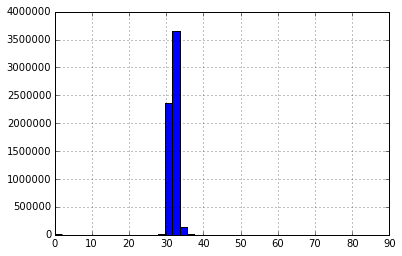

In [8]:
dot_sample['elapsed'].dropna().hist(range=(0,89),bins=45)

In [9]:
# percent of AVL pings received under 35 seconds from previous
sum(dot_sample['elapsed'].dropna()<35.0)/(1.0*(len(dot_sample['elapsed'].dropna())))

0.98604550679763969

In [17]:
# number of unique Vehicle IDs (expect <5700 on any given day, accounting for out-of-service vehicles: http://web.mta.info/nyct/facts/about_us.htm)
len(dot_sample.Vehicle.unique())

5149

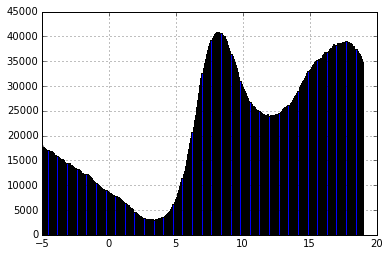

In [16]:
# number of pings recorded in 5-minute intervals, all service status
ts_float = (dot_sample.timestamp/timedelta(hours=1))-5
ts_float.hist(bins=288)

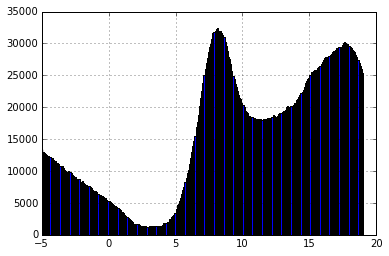

In [19]:
# number of pings recorded in 5-minute intervals, IN PROGRESS only
ts_float = (dot_sample.query('Phase == "IN_PROGRESS"').timestamp/timedelta(hours=1))-5
ts_float.hist(bins=288)

In [20]:
# number of IN_PROGRESS pings recorded by Route
dot_sample.query('Phase == "IN_PROGRESS"').groupby('Route').size()

Route
MTA NYCT_B1      24639
MTA NYCT_B11     21371
MTA NYCT_B12     24167
MTA NYCT_B13     13721
MTA NYCT_B14     11862
MTA NYCT_B15     37746
MTA NYCT_B16     15129
MTA NYCT_B17     17399
MTA NYCT_B2       5216
MTA NYCT_B20     17545
MTA NYCT_B24      8260
MTA NYCT_B25     19789
MTA NYCT_B26     22511
MTA NYCT_B3      19864
MTA NYCT_B31      4699
MTA NYCT_B32      2502
MTA NYCT_B35     49603
MTA NYCT_B36     21376
MTA NYCT_B37      8567
MTA NYCT_B38     37976
MTA NYCT_B39      1204
MTA NYCT_B4      14360
MTA NYCT_B41     55971
MTA NYCT_B42      6230
MTA NYCT_B43     20905
MTA NYCT_B44     33244
MTA NYCT_B44+    29943
MTA NYCT_B45     14103
MTA NYCT_B46     73917
MTA NYCT_B47     20158
                 ...  
MTABC_Q50        10489
MTABC_Q52        11552
MTABC_Q53        28062
MTABC_Q60        27395
MTABC_Q64         9790
MTABC_Q65        31417
MTABC_Q66        23518
MTABC_Q67         7492
MTABC_Q69        12441
MTABC_Q70         7434
MTABC_Q72         7483
MTABC_QM1         4331
MTABC